In [101]:
!pip install tweepy
!pip install tweepy.streaming

ERROR: Could not find a version that satisfies the requirement tweepy.streaming
ERROR: No matching distribution found for tweepy.streaming


In [102]:
import tweepy as tw
import pandas as pd
import twitter
import json
import requests
import json

In [103]:
%run ./keys.ipynb

In [104]:
auth = tw.OAuthHandler(consumer_key,consumer_key_secret)

In [105]:
auth.set_access_token(access_token,acess_token_secret)
api = tw.API(auth)

In [106]:
fetched_tweets = api.search_tweets("\"i have depression\"",count = 1,result_type="recent",lang="en")

In [107]:
print(fetched_tweets[0].text)

The Atlanta Falcons are the reason I have depression.


In [108]:
anchor_id = fetched_tweets[0]._json['user']['id']

for i in fetched_tweets[0]._json['user']:
    print(i)

id
id_str
name
screen_name
location
description
url
entities
protected
followers_count
friends_count
listed_count
created_at
favourites_count
utc_offset
time_zone
geo_enabled
verified
statuses_count
lang
contributors_enabled
is_translator
is_translation_enabled
profile_background_color
profile_background_image_url
profile_background_image_url_https
profile_background_tile
profile_image_url
profile_image_url_https
profile_banner_url
profile_link_color
profile_sidebar_border_color
profile_sidebar_fill_color
profile_text_color
profile_use_background_image
has_extended_profile
default_profile
default_profile_image
following
follow_request_sent
notifications
translator_type
withheld_in_countries


In [109]:
class User():
    
    def __init__(self,userID,depression_status=None,json_dump=None,followers=[],user_bio=""):
        self._userID = userID
        self._depression_status = depression_status
        self._json_dump = json_dump
        self._followers = followers
        self._user_bio = user_bio
        
    # getter method
    def get_UserID(self):
        return self._userID
    # getter method
    def get_depression_status(self):
        return self._depression_status
    # getter method
    def get_json_info(self):
        return self._json_info
    # getter method
    def get_followers(self):
        return self._followers
    # setter method
    def set_followers(self,follower_list):
        self._followers = follower_list
    # setter method
    def set_depression_status(self,new_status):
        self._depression_status = new_status
    # setter method
    def set_json_dump(self,json):
        self._json_dump= json
            
    def __str__(self):
        return 'UserID='+str(self._userID)+'\nDepression Status='+str(self._depression_status)
    

anchorUser = User(userID=fetched_tweets[0]._json['user']['id'],
                  depression_status=True,
                  json_dump=fetched_tweets[0]._json)

In [110]:
def get_friends_list(user):
    '''
    Takes an object of class User as input
    Returns a list of the users friends ids as strings
    '''

    anchor_friends_raw = api.get_friends(user_id=user.get_UserID())
    anchor_friends_ids = []

    for i in anchor_friends_raw:
        anchor_friends_ids.append(i._json['id'])
    
    return anchor_friends_ids


print(get_friends_list(anchorUser))

[3068348666, 742011151, 2573161133, 43775786, 342165503, 2423787905, 155661068, 239843671, 18527874, 321586997, 31191508, 16347506, 21436663]


In [114]:
def check_protected(userID):
    
    user = api.get_user(user_id=userID)
    print(user._json)
    if(user._json['protected'] == 'True'):
        return True
    return False

def get_tweets_by_id(userID):
    
    if (check_protected(userID) == False):
        all_tweets = api.user_timeline(user_id=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
        return all_tweets
    return []
    

tweets = get_tweets_by_id(1426662074277576705)

print(tweets[1].full_text)

{'id': 1426662074277576705, 'id_str': '1426662074277576705', 'name': 'mo is sleepy', 'screen_name': 'whofwmo', 'location': '-16 18+ dni! | white | no tw', 'profile_location': None, 'description': '16! ‘05 she/they', 'url': 'https://t.co/mQvAWDhbal', 'entities': {'url': {'urls': [{'url': 'https://t.co/mQvAWDhbal', 'expanded_url': 'https://curiouscat.qa/whofwmo', 'display_url': 'curiouscat.qa/whofwmo', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 749, 'friends_count': 188, 'listed_count': 6, 'created_at': 'Sat Aug 14 21:48:48 +0000 2021', 'favourites_count': 4536, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 2999, 'lang': None, 'status': {'created_at': 'Sun Oct 03 20:22:58 +0000 2021', 'id': 1444759904628187138, 'id_str': '1444759904628187138', 'text': 'RT @bubbly_jiminie_: am i cute ? 🥺 https://t.co/3T36wEgmn0', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mention

In [115]:
depression_phrases = ["i have depression", 
                      "i am depressed", 
                      "i am diagnosed with depression",
                      "im depressed",
                      "feeling depressed",
                      "i have clinical depression",
                      "i am clinically depressed",
                     "depressed",
                     "depression",]

def depression_check(user_list):
    count = 0
    flag = False
    
    for friend in user_list:
        tweets = get_tweets_by_id(friend)
        for info in tweets:
            #print("ID: {}".format(info.id))
            #print(info.created_at)
            #print(info.full_text)
            #print("\n")
            count+=1
    
            if (("depression" or "depressed") in info.full_text):
                print(info.full_text)
                flag = True
        print(count)

        
def depression_check_user(userID):
    """
    Takes UserID as input
    Returns boolean to identicate wether or not they are depressed
    """
    tweets = get_tweets_by_id(userID)
    depression_status = False
    
    for info in tweets:
            for depression_phrase in depression_phrases:
                if (depression_phrase in info.full_text.lower()):
                    print(info.full_text)
                    depression_status = True
    
    return depression_status  

    
depression_check_user(anchor_id)

{'id': 768583233126617088, 'id_str': '768583233126617088', 'name': 'John Bickley', 'screen_name': 'papabickler', 'location': '', 'profile_location': None, 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 34, 'friends_count': 13, 'listed_count': 0, 'created_at': 'Wed Aug 24 22:58:17 +0000 2016', 'favourites_count': 4, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 15, 'lang': None, 'status': {'created_at': 'Sun Oct 03 20:22:00 +0000 2021', 'id': 1444759661090164737, 'id_str': '1444759661090164737', 'text': 'The Atlanta Falcons are the reason I have depression.', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': 

True

  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.6
    Uninstalling decorator-5.0.6:
      Successfully uninstalled decorator-5.0.6


In [144]:
#Creating our first node from the anchor user
G.add_node(anchorUser)

In [145]:
"""
Creating user objects for every id on the anchor nodes friend list
"""

#Get list of friends of the anchorUser
friends_list = get_friends_list(anchorUser)

newUserList = []

#Creating a new user object for every ID in the anchorUsers friend list
for new_userID in friends_list:
    newUser = User(userID=new_userID,
                  depression_status=depression_check_user(new_userID)
                  )
    newUserList.append(newUser)
    

{'id': 3068348666, 'id_str': '3068348666', 'name': 'Justin King', 'screen_name': 'justinwking18', 'location': '', 'profile_location': None, 'description': 'dawgs', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 141, 'friends_count': 140, 'listed_count': 0, 'created_at': 'Sun Mar 08 14:46:39 +0000 2015', 'favourites_count': 615, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 141, 'lang': None, 'status': {'created_at': 'Fri Aug 13 04:01:38 +0000 2021', 'id': 1426031165371297794, 'id_str': '1426031165371297794', 'text': 'top 5 machinery no order: cars planes trains boats and lawnmower', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_

{'id': 43775786, 'id_str': '43775786', 'name': 'Dave Portnoy', 'screen_name': 'stoolpresidente', 'location': 'Boston', 'profile_location': None, 'description': 'El Presidente/3 time Bee Sting survivor. I own a ton of Penn Stock. I’m not a financial advisor. Don’t trust anything I say about stocks. Owner of DDTG Global', 'url': 'https://t.co/0FXUs0Q7g8', 'entities': {'url': {'urls': [{'url': 'https://t.co/0FXUs0Q7g8', 'expanded_url': 'http://boston.barstoolsports.com', 'display_url': 'boston.barstoolsports.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 2702680, 'friends_count': 1349, 'listed_count': 6892, 'created_at': 'Sun May 31 23:08:06 +0000 2009', 'favourites_count': 2984, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 84975, 'lang': None, 'status': {'created_at': 'Sun Oct 03 19:05:36 +0000 2021', 'id': 1444740434195095558, 'id_str': '1444740434195095558', 'text': 'Biggest regular s

{'id': 155661068, 'id_str': '155661068', 'name': 'Athens Georgia', 'screen_name': 'Athens_GA', 'location': 'Athens, GA', 'profile_location': None, 'description': 'All Athens, All The Time.', 'url': 'http://t.co/iegQusflhI', 'entities': {'url': {'urls': [{'url': 'http://t.co/iegQusflhI', 'expanded_url': 'http://www.MyLocalPledge.com', 'display_url': 'MyLocalPledge.com', 'indices': [0, 22]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 645, 'friends_count': 276, 'listed_count': 18, 'created_at': 'Mon Jun 14 19:16:04 +0000 2010', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 29, 'lang': None, 'status': {'created_at': 'Fri Dec 31 17:10:22 +0000 2010', 'id': 20889513010139137, 'id_str': '20889513010139137', 'text': 'We are wishing everyone a safe and Happy New Year. Please designate a driver or call for a ride home.', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_ment

{'id': 31191508, 'id_str': '31191508', 'name': 'Georgia Bulldogs', 'screen_name': 'UGAAthletics', 'location': 'Athens, GA', 'profile_location': None, 'description': 'Go Dawgs.', 'url': 'https://t.co/HxSbZheIyj', 'entities': {'url': {'urls': [{'url': 'https://t.co/HxSbZheIyj', 'expanded_url': 'http://www.georgiadogs.com', 'display_url': 'georgiadogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 616552, 'friends_count': 286, 'listed_count': 1418, 'created_at': 'Tue Apr 14 18:42:35 +0000 2009', 'favourites_count': 5949, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 31125, 'lang': None, 'status': {'created_at': 'Sun Oct 03 17:24:53 +0000 2021', 'id': 1444715090155036682, 'id_str': '1444715090155036682', 'text': "RT @UGASoccer: 🆕 Today's match will kick off this evening at 5 p.m. on ESPNU!\n\n#GoDawgs 🐾", 'truncated': False, 'entities': {'hashtags': [{'text': 'GoDawgs', 'indices': [79, 87]}

In [146]:
for user in newUserList:
    print(user)

UserID=3068348666
Depression Status=False
UserID=742011151
Depression Status=False
UserID=2573161133
Depression Status=False
UserID=43775786
Depression Status=False
UserID=342165503
Depression Status=False
UserID=2423787905
Depression Status=False
UserID=155661068
Depression Status=False
UserID=239843671
Depression Status=False
UserID=18527874
Depression Status=False
UserID=321586997
Depression Status=False
UserID=31191508
Depression Status=False
UserID=16347506
Depression Status=False
UserID=21436663
Depression Status=False


     |████████████████████████████████| 36.8 MB 11.0 MB/s eta 0:00:01
  Created wheel for matplotlib: filename=matplotlib-2.2.3-cp38-cp38-macosx_10_9_x86_64.whl size=8092629 sha256=cbc0c60b939e0fd2c5309fe0ddf295429b1f389b81e9ee41e1c72f074375d724
  Stored in directory: /Users/filipbosnjak/Library/Caches/pip/wheels/32/9e/42/1c91b0d0aa4bc87be038ee6aa88f303df10286c165feaa9823
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4


NetworkXError: random_state_index is incorrect

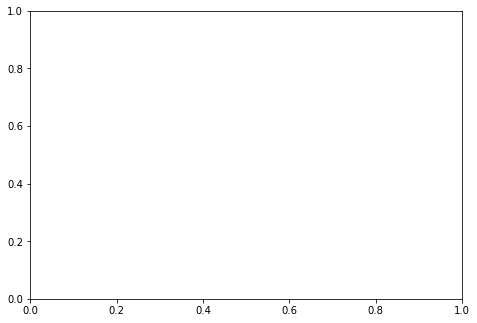

In [151]:
import matplotlib.pyplot as plt

nx.draw(G)